In [4]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', size=12)
plt.rc('axes', labelsize=12)

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('./prices_train.csv')

In [35]:
df = df.drop(['Id'], axis=1)
df.count()

MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
Street           1460
Alley              91
LotShape         1460
LandContour      1460
Utilities        1460
LotConfig        1460
LandSlope        1460
Neighborhood     1460
Condition1       1460
Condition2       1460
BldgType         1460
HouseStyle       1460
OverallQual      1460
OverallCond      1460
YearBuilt        1460
YearRemodAdd     1460
RoofStyle        1460
RoofMatl         1460
Exterior1st      1460
Exterior2nd      1460
MasVnrType       1452
MasVnrArea       1452
ExterQual        1460
ExterCond        1460
Foundation       1460
BsmtQual         1423
                 ... 
BedroomAbvGr     1460
KitchenAbvGr     1460
KitchenQual      1460
TotRmsAbvGrd     1460
Functional       1460
Fireplaces       1460
FireplaceQu       770
GarageType       1379
GarageYrBlt      1379
GarageFinish     1379
GarageCars       1460
GarageArea       1460
GarageQual       1379
GarageCond       1379
PavedDrive

In [36]:
len( df.columns )

80

## Nombre de valeurs uniques par variables
Est-ce que ce sont des variables quantitatif ou bien qualitatif ? 

In [37]:
class_size = [ (c, len( df[c].unique() ) ) for c in df.columns ]
class_size.sort( key=lambda x:x[1] )

In [38]:
print( class_size )

[('Street', 2), ('Utilities', 2), ('CentralAir', 2), ('Alley', 3), ('LandSlope', 3), ('BsmtHalfBath', 3), ('HalfBath', 3), ('PavedDrive', 3), ('LotShape', 4), ('LandContour', 4), ('ExterQual', 4), ('BsmtFullBath', 4), ('FullBath', 4), ('KitchenAbvGr', 4), ('KitchenQual', 4), ('Fireplaces', 4), ('GarageFinish', 4), ('PoolQC', 4), ('MSZoning', 5), ('LotConfig', 5), ('BldgType', 5), ('MasVnrType', 5), ('ExterCond', 5), ('BsmtQual', 5), ('BsmtCond', 5), ('BsmtExposure', 5), ('HeatingQC', 5), ('GarageCars', 5), ('Fence', 5), ('MiscFeature', 5), ('YrSold', 5), ('RoofStyle', 6), ('Foundation', 6), ('Heating', 6), ('Electrical', 6), ('FireplaceQu', 6), ('GarageQual', 6), ('GarageCond', 6), ('SaleCondition', 6), ('BsmtFinType1', 7), ('BsmtFinType2', 7), ('Functional', 7), ('GarageType', 7), ('Condition2', 8), ('HouseStyle', 8), ('RoofMatl', 8), ('BedroomAbvGr', 8), ('PoolArea', 8), ('Condition1', 9), ('OverallCond', 9), ('SaleType', 9), ('OverallQual', 10), ('TotRmsAbvGrd', 12), ('MoSold', 12),

In [28]:
for classname, k in class_size[:60]:
    print( '%s (%i): %s' % (classname , k, ' - '.join( [str(s) for s in df[classname].unique() ])) )

Street (2): Pave - Grvl
Utilities (2): AllPub - NoSeWa
CentralAir (2): Y - N
Alley (3): nan - Grvl - Pave
LandSlope (3): Gtl - Mod - Sev
BsmtHalfBath (3): 0 - 1 - 2
HalfBath (3): 1 - 0 - 2
PavedDrive (3): Y - N - P
LotShape (4): Reg - IR1 - IR2 - IR3
LandContour (4): Lvl - Bnk - Low - HLS
ExterQual (4): Gd - TA - Ex - Fa
BsmtFullBath (4): 1 - 0 - 2 - 3
FullBath (4): 2 - 1 - 3 - 0
KitchenAbvGr (4): 1 - 2 - 3 - 0
KitchenQual (4): Gd - TA - Ex - Fa
Fireplaces (4): 0 - 1 - 2 - 3
GarageFinish (4): RFn - Unf - Fin - nan
PoolQC (4): nan - Ex - Fa - Gd
MSZoning (5): RL - RM - C (all) - FV - RH
LotConfig (5): Inside - FR2 - Corner - CulDSac - FR3
BldgType (5): 1Fam - 2fmCon - Duplex - TwnhsE - Twnhs
MasVnrType (5): BrkFace - None - Stone - BrkCmn - nan
ExterCond (5): TA - Gd - Fa - Po - Ex
BsmtQual (5): Gd - TA - Ex - nan - Fa
BsmtCond (5): TA - Gd - nan - Fa - Po
BsmtExposure (5): No - Gd - Mn - Av - nan
HeatingQC (5): Ex - Gd - TA - Fa - Po
GarageCars (5): 2 - 3 - 1 - 0 - 4
Fence (5): nan - M

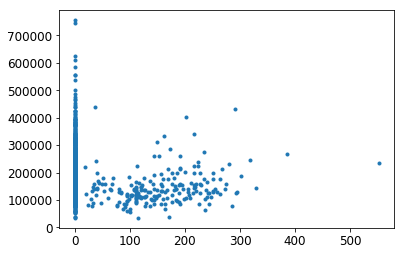

In [45]:
plt.plot( df['EnclosedPorch'], df['SalePrice'], '.')

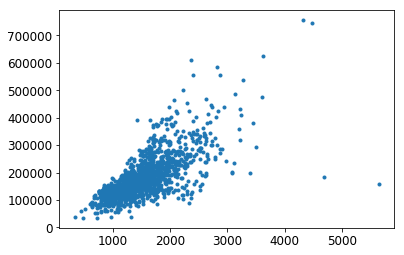

In [44]:
plt.plot( df['GrLivArea'], df['SalePrice'], '.')

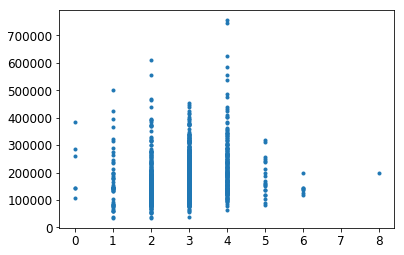

In [32]:
plt.plot( df['BedroomAbvGr'], df['SalePrice'], '.')

## Gini pour chaques varialbles

In [ ]:
for classname, k in class_size[:60]:
    print( '%s (%i): %s' % (classname , k, ' - '.join( [str(s) for s in df[classname].unique() ])) )